In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../datasets/titanic.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

# type(df.shape)

(891, 12)

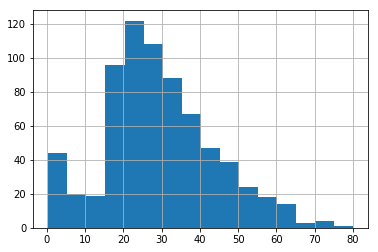

In [4]:
df['Age'].hist(bins=16)
plt.show()

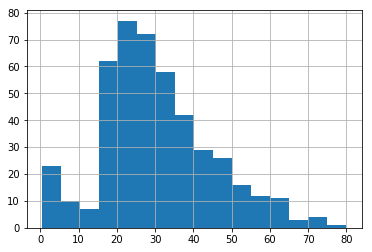

In [7]:
df[(df["Sex"] == "male")].Age.hist(bins = 16)
plt.show()

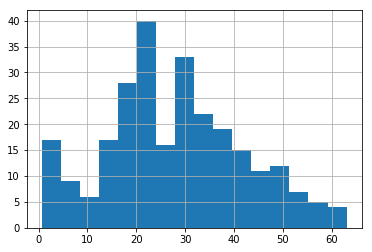

In [6]:
df[(df["Sex"] == "female")].Age.hist(bins = 16)

In [42]:
df["Cabin"].isna().sum()

687

In [20]:
df["Gender"] = df['Sex'].map({'female': 0, 'male': 1}).astype(int) 

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


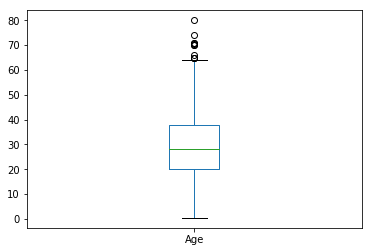

In [22]:
df['Age'].plot.box()

In [36]:
# not_null = df["Age"].isna()
# not_null
# type(not_null)
# df.loc[df.Age == 'NaN', 'education'].count()

pandas.core.series.Series

In [35]:
df['Age'].dropna().values

numpy.ndarray

In [37]:
df[df['Embarked'] == 'C'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,1


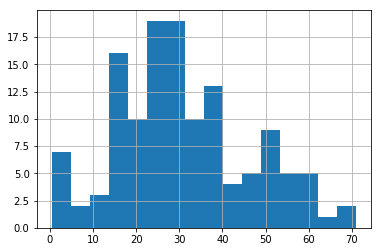

In [44]:
# df[(df["Sex"] == "female")].Age.hist(bins = 16)
#the age range of passenger whose their embarked were C
df[df['Embarked'] == 'C']['Age'].hist(bins=16)

In [45]:
df[df['Embarked'] == 'C']['Age']

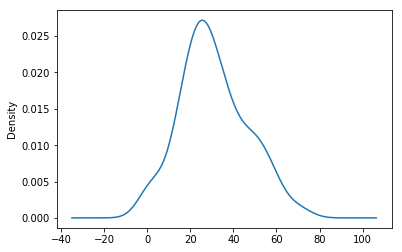

In [46]:
df[df['Embarked'] == 'C']['Age'].plot(kind='kde')

In [50]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [48]:
df['Embarked'].nunique() #How many unique values does Embarked have?

3

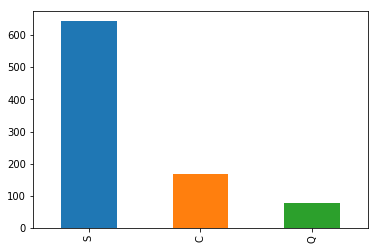

In [70]:
df['Embarked'].value_counts().plot(kind='bar')

# kind : str
# ‘line’ : line plot (default)
# ‘bar’ : vertical bar plot
# ‘barh’ : horizontal bar plot
# ‘hist’ : histogram
# ‘box’ : boxplot
# ‘kde’ : Kernel Density Estimation plot
# ‘density’ : same as ‘kde’
# ‘area’ : area plot
# ‘pie’ : pie plot
# ‘scatter’ : scatter plot
# ‘hexbin’ : hexbin plot

In [71]:
df['Embarked'].value_counts()

pandas.core.series.Series

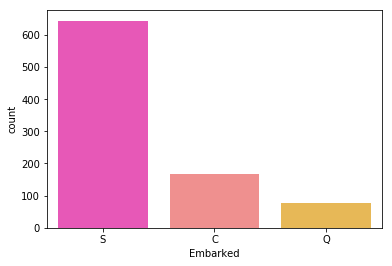

In [74]:
sns.countplot(x="Embarked", palette="spring", data=df)

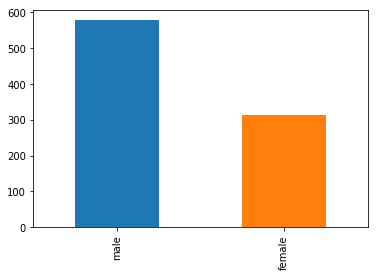

In [75]:
df['Sex'].value_counts().plot(kind='bar')

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

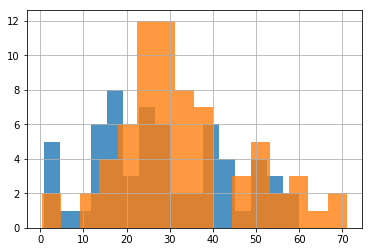

In [83]:
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].hist(bins=16, alpha=.8)# How many of the passengers were childs, youth, middle age, and old based on their Sex for those who 'Embarked' in section 'C'?

In [86]:
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].mean()

Sex
female    28.344262
male      32.998841
Name: Age, dtype: float64

In [87]:
type(df[df['Embarked'] == 'C'].groupby('Sex'))

pandas.core.groupby.groupby.DataFrameGroupBy

In [88]:
df[df['Embarked'] == 'C'].groupby('Sex')['Age'].agg(np.mean)

Sex
female    28.344262
male      32.998841
Name: Age, dtype: float64